In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing,Standardizing
from sklearn.preprocessing import StandardScaler

#For Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Models
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

#Metrics
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,precision_score,classification_report,plot_roc_curve

import warnings
warnings.filterwarnings('ignore')

In [38]:
df=pd.read_csv(r'C:\Users\delkl\Desktop\DataTrained Data Science Projects\Projects\HR.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


## EDA

In [4]:
df.shape

(1470, 35)

We have 1470 rows and 35 columns in the dataset

In [5]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

We have object type value in 8 independent variable and the rest we have int type value.
Attrition is our target variable where in we have classes

In [6]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

We don't have any null or missing values in the dataset

In [7]:
df['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

There are 2 unique values or classes in our target variable

In [8]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

There are 1233 values for No and only 237 values for Yes

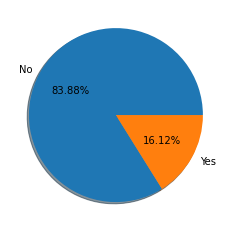

In [9]:
#Plotting pie chart for class variable

labels='No','Yes'

fig,ax=plt.subplots()
ax.pie(df['Attrition'].value_counts(),labels=labels,autopct='%1.2f%%',shadow=True)

plt.show()

We can see class is imbalanced since 83.88% have No value and only 16.12% have Yes value

In [10]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [46]:
#Observation

#1. No Null values
#2. Outliers present in MonthlyIncome, NumCompaniesWorked, TotalWorkingYears, TrainingTimesLastYear, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion and YearsWithCurrManager

In [11]:
#Finding out duplicates and dropping if any

df.drop_duplicates(inplace=True)
df.shape

(1470, 35)

The shape remains same, hence, no duplicates found.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

The info shows what we have done above. 1470 rows and 35 columns with none of them having null values.

## Univariate Analysis

<AxesSubplot:xlabel='Attrition', ylabel='count'>

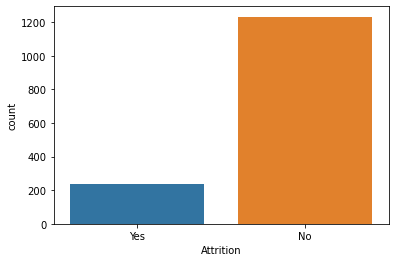

In [13]:
sns.countplot(df['Attrition'])

The classes are not equally distributed. Clearly Class imbalance problem.

## Multivariate Analysis

In [14]:
#Finding out the unique values in each column

df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

Dropping EmployeeCount, Over18 and StandardHours since the unique value is 1 and EmployeeNumber since the unique value is 1470 which is equal to the number of rows. Hence these features aren't useful.

In [39]:
df.drop(columns=['EmployeeCount','EmployeeNumber','Over18','StandardHours'],axis=1,inplace=True)

In [40]:
#Converting strings into numberical format

from sklearn.preprocessing import LabelEncoder

lab_enc=LabelEncoder()

df1=lab_enc.fit_transform(df['Attrition'])
df2=lab_enc.fit_transform(df['BusinessTravel'])
df3=lab_enc.fit_transform(df['Department'])
df4=lab_enc.fit_transform(df['EducationField'])
df5=lab_enc.fit_transform(df['Gender'])
df6=lab_enc.fit_transform(df['JobRole'])
df7=lab_enc.fit_transform(df['MaritalStatus'])
df8=lab_enc.fit_transform(df['OverTime'])

df['Attrition']=df1
df['BusinessTravel']=df2
df['Department']=df3
df['EducationField']=df4
df['Gender']=df5
df['JobRole']=df6
df['MaritalStatus']=df7
df['OverTime']=df8

We have converted the whole dataset into numerical format so that our ML model can understand it better

In [17]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


In [29]:
df.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,2.721769,0.600000,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,1.093082,0.490065,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,2.000000,0.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,3.000000,1.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,4.000000,1.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,4.000000,1.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


We can see that we have converted it succesfully.

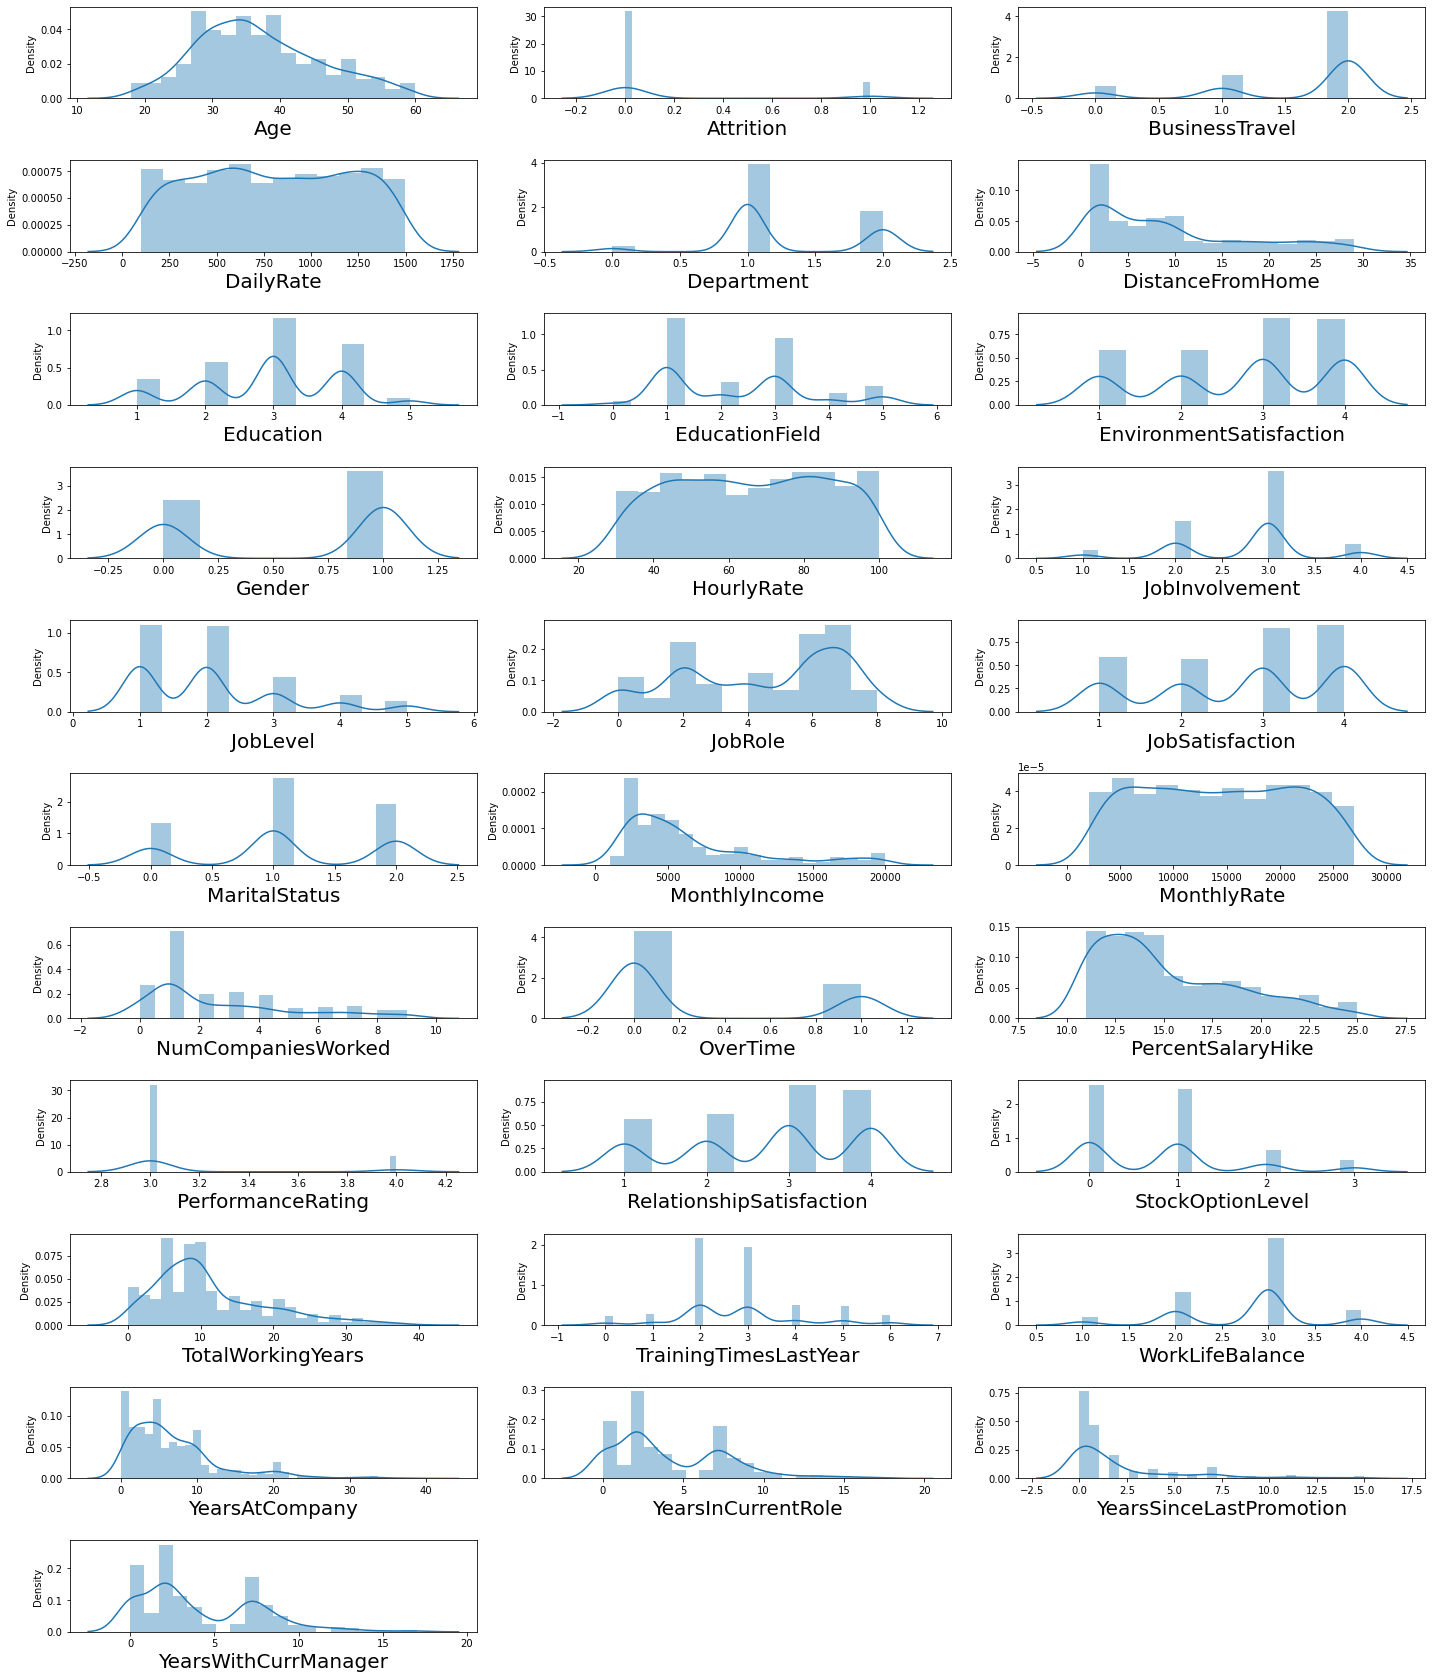

In [22]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=36:
        ax=plt.subplot(12,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    
    plotnumber+=1
plt.tight_layout()

Monthly Income, Distance From Home,Total Working Years, Years At Company, Years in Current Role, Years Since Last Promotion, Years With Current Manager, Percent Salary Hike, NumCompaniesWorked are skewed

## Finding outliers

In [30]:
df_features=df[['DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

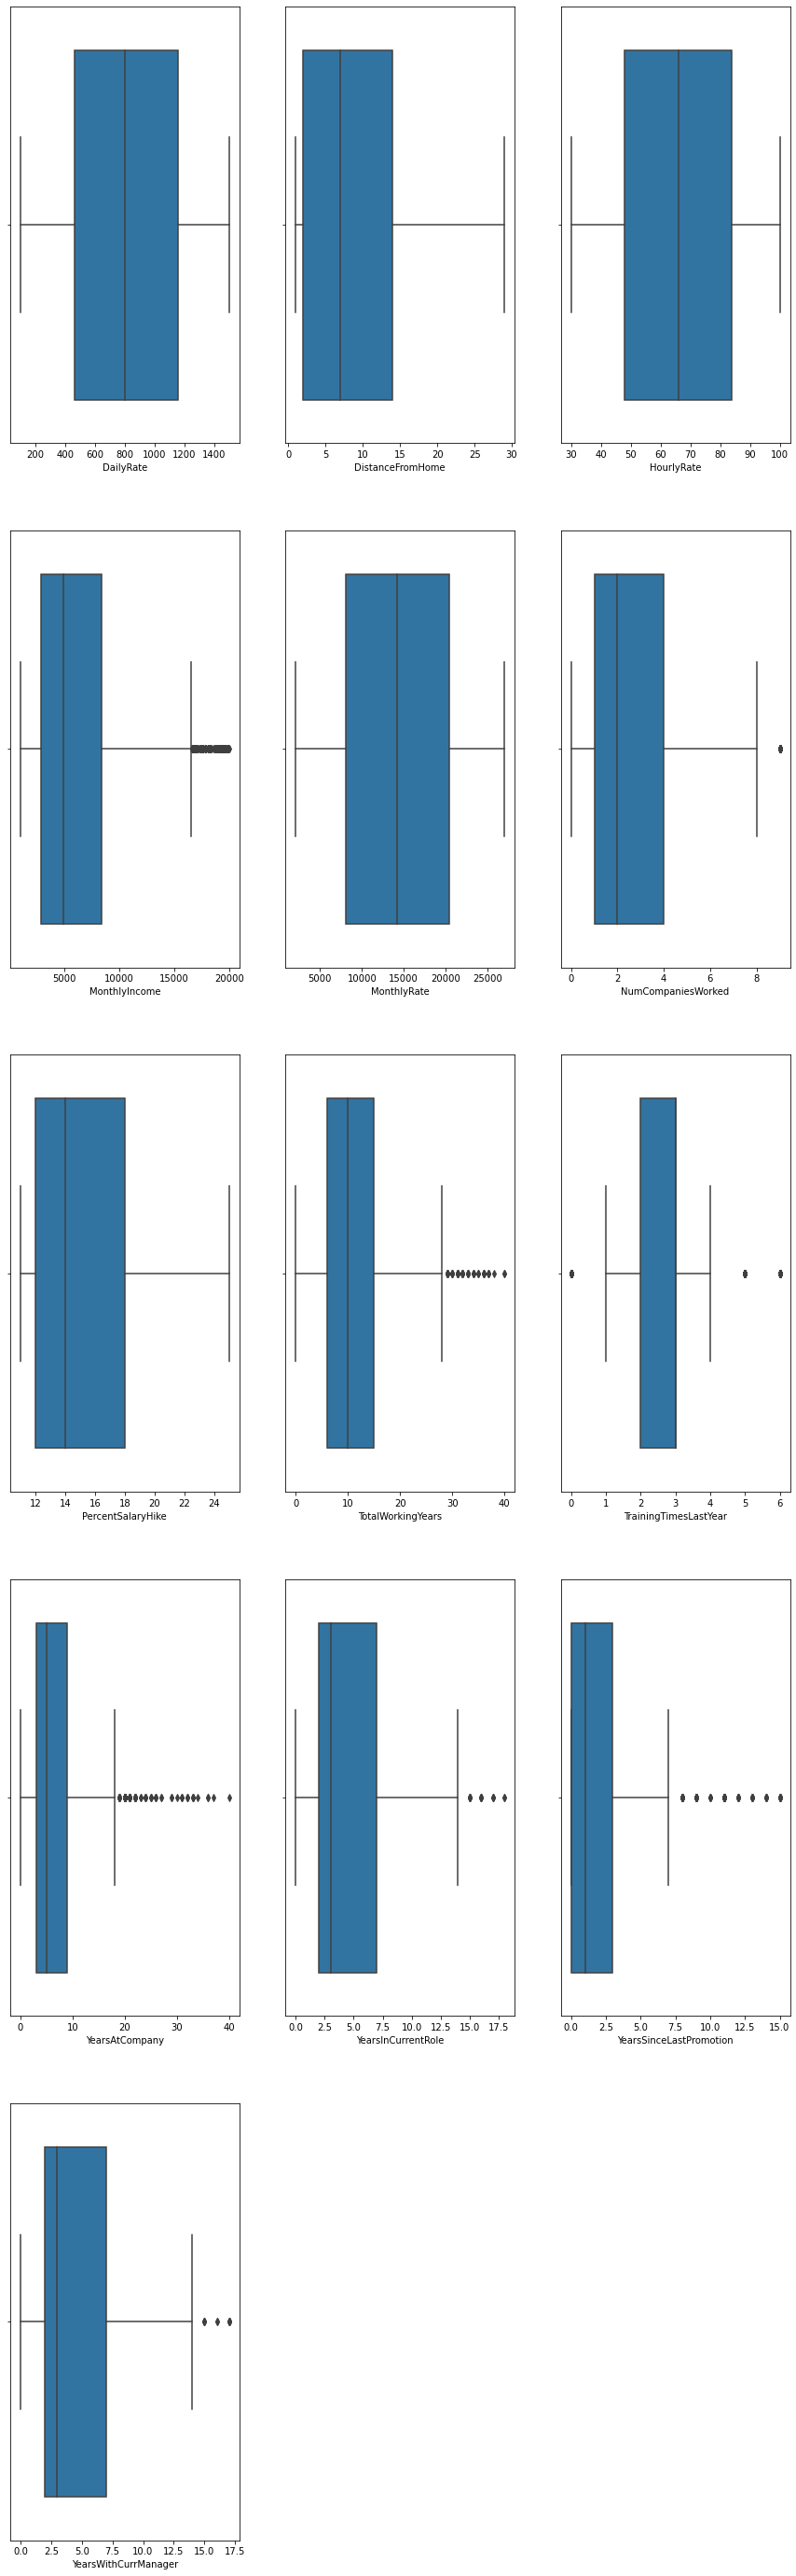

In [31]:
plt.figure(figsize=(15,50))
graph=1

for column in df_features:
    if(graph<=15):
        ax=plt.subplot(5,3,graph)
        sns.boxplot(df_features[column],orient='v')
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

We can see there are outliers in MonthlyIncome, NumCompaniesWorked, TotalWorkingYears, TrainingTimesLastYear, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion and YearsWithCurrManager

## Removing Outliers

In [41]:
from scipy.stats import zscore

z=np.abs(zscore(df))
new_df=df[(z<3).all(axis=1)]

Using zscore method because by iqr method huge amount of data will be lost

In [42]:
new_df.shape

(1387, 31)

In [40]:
df.shape

(1470, 31)

In [44]:
(1470-1387)/1470

0.05646258503401361

Around 6% data lost but its affordable rather than losing more than 20% data by iqr method

In [41]:
new_df.skew()

Age                         0.472280
Attrition                   1.805983
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
Y

In [42]:
#finding out correlation between the features
corr=new_df.corr()
corr.shape

(31, 31)

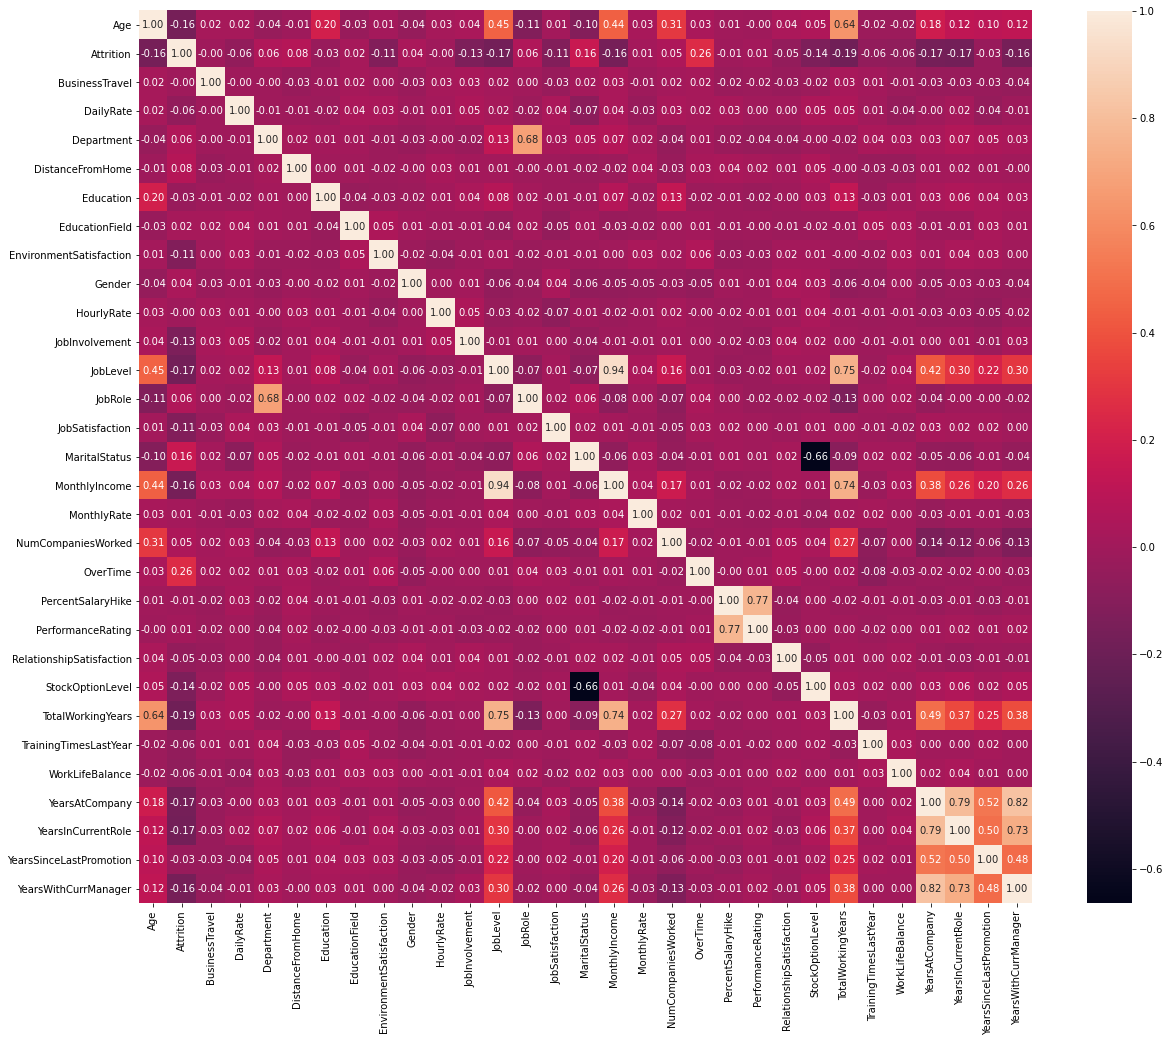

In [43]:
#plotting the heatmap of correlation between features

plt.figure(figsize=(20,20))

sns.heatmap(corr,cbar=True,square=True,cbar_kws={'shrink':0.82},fmt='.2f',annot=True,annot_kws={'size':10})
plt.show()

We can see MonthlyIncome has very high collinearity with JobLevel. We will confirm it by vif method later.

## Removing skewness

In [44]:
new_df['DistanceFromHome']=np.sqrt(new_df['DistanceFromHome'])
new_df['JobLevel']=np.sqrt(new_df['JobLevel'])
new_df['NumCompaniesWorked']=np.sqrt(new_df['NumCompaniesWorked'])
new_df['MonthlyIncome']=np.sqrt(new_df['MonthlyIncome'])
new_df['PercentSalaryHike']=np.sqrt(new_df['PercentSalaryHike'])
new_df['PerformanceRating']=np.sqrt(new_df['PerformanceRating'])
new_df['PercentSalaryHike']=np.sqrt(new_df['PercentSalaryHike'])
new_df['StockOptionLevel']=np.sqrt(new_df['StockOptionLevel'])
new_df['TotalWorkingYears']=np.sqrt(new_df['TotalWorkingYears'])
new_df['TrainingTimesLastYear']=np.sqrt(new_df['TrainingTimesLastYear'])
new_df['WorkLifeBalance']=np.sqrt(new_df['WorkLifeBalance'])
new_df['YearsAtCompany']=np.sqrt(new_df['YearsAtCompany'])
new_df['YearsInCurrentRole']=np.sqrt(new_df['YearsInCurrentRole'])
new_df['YearsSinceLastPromotion']=np.sqrt(new_df['YearsSinceLastPromotion'])
new_df['YearsWithCurrManager']=np.sqrt(new_df['YearsWithCurrManager'])

Removing skewness of those that are very less correlated with our target variable

In [46]:
X=new_df.drop(columns=['Attrition'],axis=1)
y=new_df['Attrition']

In [47]:
y.value_counts()

0    1158
1     229
Name: Attrition, dtype: int64

Since the class is imbalance, we will balance the class

In [48]:
#Balancing the class

from imblearn.over_sampling import SMOTE
SM=SMOTE()
X,y=SM.fit_resample(X,y)

y.value_counts()

1    1158
0    1158
Name: Attrition, dtype: int64

The class is now balanced

In [49]:
#Checking multicollinearity by vif

scaler=StandardScaler()
X_scaler=scaler.fit_transform(X)

vif=pd.DataFrame()
vif['score']=[variance_inflation_factor(X_scaler,i) for i in range(X_scaler.shape[1])]
vif['Features']=X.columns

vif

,score,Features
0,1.932722,Age
1,1.041050,BusinessTravel
2,1.049673,DailyRate
3,1.976296,Department
4,1.042143,DistanceFromHome
5,1.080370,Education
6,1.048724,EducationField
7,1.079779,EnvironmentSatisfaction
8,1.057214,Gender
9,1.033290,HourlyRate


As seen in the heatmap, JobLevel is having High collinearity so we will remove it. Also its a categorical variable.

In [50]:
X.drop(columns=['JobLevel'],axis=1,inplace=True)

In [51]:
scaler=StandardScaler()
X_scaler=scaler.fit_transform(X)

vif=pd.DataFrame()
vif['score']=[variance_inflation_factor(X_scaler,i) for i in range(X_scaler.shape[1])]
vif['Features']=X.columns

vif

,score,Features
0,1.932718,Age
1,1.037638,BusinessTravel
2,1.049483,DailyRate
3,1.908717,Department
4,1.031696,DistanceFromHome
5,1.080112,Education
6,1.048350,EducationField
7,1.078612,EnvironmentSatisfaction
8,1.055176,Gender
9,1.032844,HourlyRate


## Finding the best random state

In [65]:
maxAccu=0
maxRs=0
for i in range(1,200):
    X_train,x_test,Y_train,y_test=train_test_split(X_scaler,y,test_size=0.25,random_state=i)
    mod=DecisionTreeClassifier()
    mod.fit(X_train,Y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print("Best accuracy is:",maxAccu,"on Random State",maxRs)

Best accuracy is: 0.8652849740932642 on Random State 73


In [66]:
X_train,x_test,Y_train,y_test=train_test_split(X_scaler,y,test_size=0.25,random_state=73)

In [67]:
DTC=DecisionTreeClassifier()
DTC.fit(X_train,Y_train)
pred=DTC.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84       286
           1       0.84      0.85      0.85       293

    accuracy                           0.84       579
   macro avg       0.84      0.84      0.84       579
weighted avg       0.84      0.84      0.84       579



In [68]:
RFC=RandomForestClassifier()
RFC.fit(X_train,Y_train)
pred=RFC.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       286
           1       0.94      0.88      0.91       293

    accuracy                           0.91       579
   macro avg       0.91      0.91      0.91       579
weighted avg       0.91      0.91      0.91       579



In [69]:
SV=SVC()
SV.fit(X_train,Y_train)
pred=SV.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       286
           1       0.91      0.91      0.91       293

    accuracy                           0.91       579
   macro avg       0.91      0.91      0.91       579
weighted avg       0.91      0.91      0.91       579



In [71]:
lr=LogisticRegression()
lr.fit(X_train,Y_train)
pred=lr.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       286
           1       0.83      0.85      0.84       293

    accuracy                           0.83       579
   macro avg       0.83      0.83      0.83       579
weighted avg       0.83      0.83      0.83       579



## Cross validation

In [72]:
from sklearn.model_selection import cross_val_score

In [73]:
print(cross_val_score(DTC,X_scaler,y,cv=5).mean())

0.8066442615625233


In [74]:
print(cross_val_score(RFC,X_scaler,y,cv=5).mean())

0.8930308333953972


In [75]:
print(cross_val_score(SV,X_scaler,y,cv=5).mean())

0.8787526997840173


In [77]:
print(cross_val_score(lr,X_scaler,y,cv=5).mean())

0.8079010575705668


The difference between Random Forest CLassifier and Logistic Regression is same but F1 Score for RFC is more so we choose RFC as the best model

## Hyperparameter Tuning

Lets see if we increase the accuracy of our best model

In [78]:
parameters={'n_estimators':[200,700],
           'max_features':['auto','sqrt','log2'],
           'criterion':['gini', 'entropy'],
           'max_depth':[4,5,6,7,8]}

In [79]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [80]:
GCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 700]})

In [81]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [82]:
Final_model=RandomForestClassifier(n_estimators=200,max_features='sqrt',criterion='gini',max_depth=8)
Final_model.fit(X_train,Y_train)
pred=Final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print('Accuracy:',acc*100)

Accuracy: 90.50086355785838


The Accuracy is still 91

## Plotting AUC ROC Curve

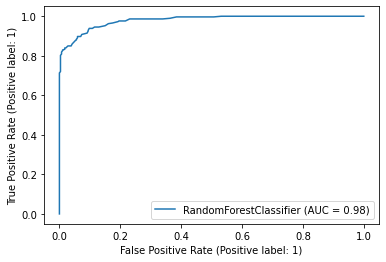

In [83]:
plot_roc_curve(RFC,x_test,y_test)
plt.show()

## Saving Model

In [84]:
import joblib
joblib.dump(Final_model,"FinalModelHR.pkl")

['FinalModelHR.pkl']

## Loading Model

In [85]:
mod=joblib.load("FinalModelHR.pkl")
print(mod.predict(x_test))

[0 1 1 0 1 1 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 0 0 0 1
 0 1 1 0 0 1 0 0 0 1 0 1 0 1 1 0 1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 1 0
 1 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 0 0 1 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 1 1
 0 1 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 0 0 0 1
 0 0 0 0 1 1 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0
 1 1 0 0 1 1 0 0 1 1 1 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 1
 1 1 0 1 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 1 1 1
 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0
 0 0 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 0 0 0 0 1 0 0
 1 1 1 0 0 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 0 1 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1
 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1
 0 0 1 1 0 0 1 0 1 1 0 0 